Домашнее задание по теории вероятности. Зайцев А.Н.

Задача 1
В ящике находится 15 качественных и 5 бракованных деталей. Наудачу извлекаются 2 детали. 
Найти вероятность того, что:
а) обе детали будут качественными; 
б) одна деталь будет качественной, а одна –бракованной; 
в) обе детали бракованны

In [31]:
from math import factorial

quality_parts = 15    #количество качественных деталей
defective_parts = 5   #количество бракованных 
total = quality_parts + defective_parts #общее число деталей
samples = 2 #количество деталей в выборке

def combinations(total: int, samples: int) -> float:
    '''function return amount of combinations calc with formula total! / (samples! * (total - samples)!)
        total - total amount of samples
        samples - amount of samples
    '''

    return factorial(total) / (factorial(samples) * factorial(total - samples))

# общее число исходов
total_c = combinations(total, samples)

#Число исходов когда 2 хорошие в выборке
quality_2 = combinations(quality_parts, samples)
print(f'Вероятность достать 2 качественные детали: {(quality_2) / total_c:.2f}')

#1 брак и 1 хорошая в выборке
quality_choices = combinations(quality_parts, 1)
defective_choices = combinations(defective_parts, 1)
print(f'Вероятность достать одну качественную и одну бракованную: {(quality_choices * defective_choices) / total_c:.2f}')

#Обе бракованные в выборке
defective_choices = combinations(defective_parts, samples)
print(f'Вероятность достать обе бракованные: {(defective_choices) / total_c:.2f}')


Вероятность достать 2 качественные детали: 0.55
Вероятность достать одну качественную и одну бракованную: 0.39
Вероятность достать обе бракованные: 0.05


Задача 2
При рентгеновском обследовании вероятность обнаружить заболевание туберкулезом у больного туберкулезом равна 0.9,
вероятность принять здорового человека за больного равна 0.01. Доля больных туберкулезом по отношению ко всему населению равна 0.001. 
Найти вероятность того, что человек здоров, если он был признан больным при обследовании.

In [29]:
#A - событие диагностирован туберкулез
#B1 - событие человек здоров
#В2 - событие человек болен


p_AB2 = 0.9 #вероятность обнаружить туберкулез у больного
p_AB1 = 0.01 #вероятность обнаружить туберкулез у здорового
p_B2 = 0.001 #Доля больных туберкулезом по отношению ко всему населению
p_B1 = 1 - p_B2  # Доля здоровых людей в целом

#Находим вероятность диагностики туберкулеза в общем случае
p_A = p_AB1 * p_B1 + p_AB2 * p_B2

#Условная вероятность что человек здоров при положительном тесте
p_B1A = p_AB1 * p_B1 / p_A

print(f'Вероятность что человек здоров при положительном тесте {p_B1A:.5f}')

Вероятность что человек здоров при положительном тесте 0.91736


Задача 3
Известно, что случайная величина «время до наступления отказа исследуемых изделий» подчиняется логнормальному распределению (lognorm)
с параметрами loc=0, scale=5, s=0.5. 
Требуется построить графики функции плотностии функции распределения, найти математическое ожидание,дисперсиюи время безотказной работы с вероятностью 0.9(квантиль уровня 0.1).

Мат ожидание 5.6657 Дисперсия: 9.1174
Время безотказной работы с вероятностью 0,9 (PPF): 2.6344
Время безотказной работы с вероятностью 0,9 (Numpy quantile): 2.6338


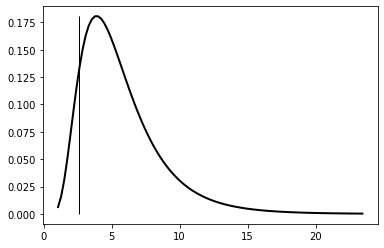

In [28]:
from scipy.stats import lognorm
import matplotlib.pyplot as plt
import numpy as np

#фиксируем random seed для повторяемости экспериментов
np.random.seed(42)

#параметры распределения
loc = 0
scale = 5
s = 0.5

#создаем распределение с заданными параметрами
rv = lognorm(loc = loc, scale = scale, s = s)

#Рассчитываем мат ожидание (среднее значение (mean)) и дисперсию
print(f'Мат ожидание {rv.mean():.4f} Дисперсия: {rv.var():.4f}')

#создаем набор x из 100 точек для построения графика
x = np.linspace(rv.ppf(0.001), rv.ppf(0.999), 100)

#Рассчитываем значения функции плотность вероятности (PDF- Probability density function)
y = rv.pdf(x)

#Находим квантиль уровня 0,1 при помощи функции PPF (Percent point function)
quant_10 = rv.ppf(0.1)
print(f'Время безотказной работы с вероятностью 0,9 (PPF): {quant_10:.4f}')

#Альтернативный способ через numpy
#формируем выборку из 1М элементов и считаем квантиль при помощи numpy
print(f'Время безотказной работы с вероятностью 0,9 (Numpy quantile): {np.quantile(rv.rvs(size = 1000000), 0.1):.4f}')

fig, ax = plt.subplots(1, 1)
#Добавим линию квантиль 10 для наглядности 
ax.vlines(quant_10, 0, max(y), color='k', linestyle='-', lw=1)

ax.plot(x, y, 'k-', lw=2, label='pdf')

